In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for plots inside the notebook
%matplotlib inline

In [4]:
file_path = "../healthcare_dataset.csv"

df=pd.read_csv(file_path)

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
df.shape

(55500, 15)

In [7]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [8]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [9]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])

In [10]:
daily_admissions = df.groupby('Date of Admission').size()

daily_admissions = daily_admissions.rename('admissions')

daily_admissions = daily_admissions.sort_index()

print(daily_admissions.head())
print(daily_admissions.tail())

Date of Admission
2019-05-08    27
2019-05-09    38
2019-05-10    17
2019-05-11    25
2019-05-12    36
Name: admissions, dtype: int64
Date of Admission
2024-05-03    31
2024-05-04    24
2024-05-05    26
2024-05-06    33
2024-05-07    33
Name: admissions, dtype: int64


In [11]:
daily_admissions = daily_admissions.asfreq("D", fill_value=0)

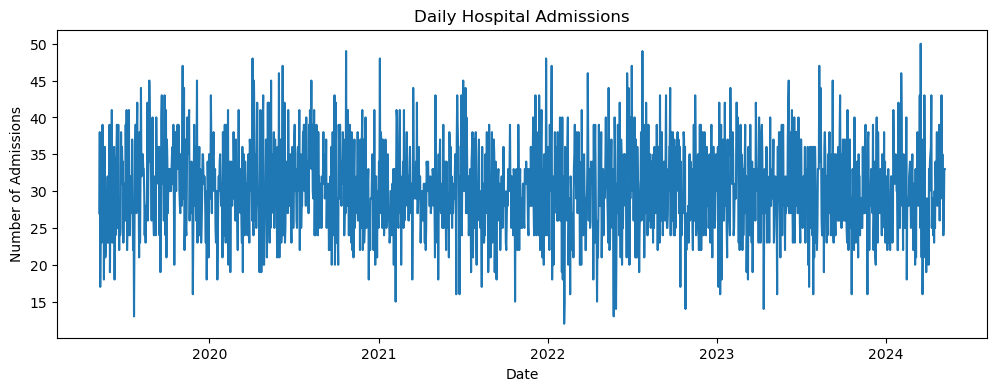

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(daily_admissions.index, daily_admissions.values)
plt.title("Daily Hospital Admissions")
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.show()

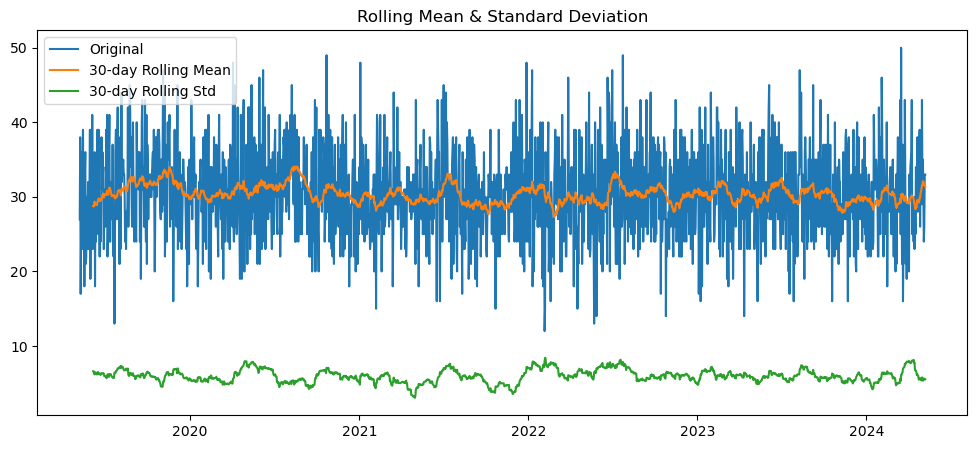

In [13]:
rolling_mean = daily_admissions.rolling(window=30).mean()
rolling_std = daily_admissions.rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(daily_admissions, label='Original')
plt.plot(rolling_mean, label='30-day Rolling Mean')
plt.plot(rolling_std, label='30-day Rolling Std')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_admissions)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -43.8477001478261
p-value: 0.0


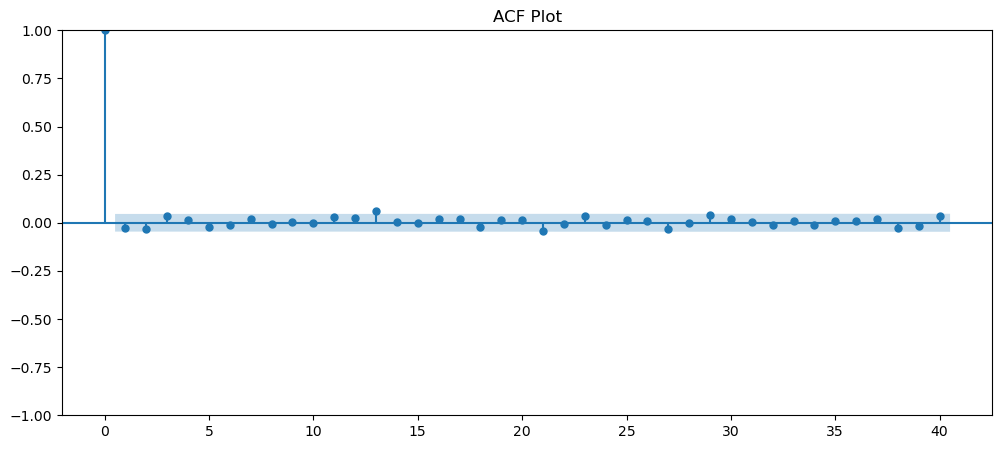

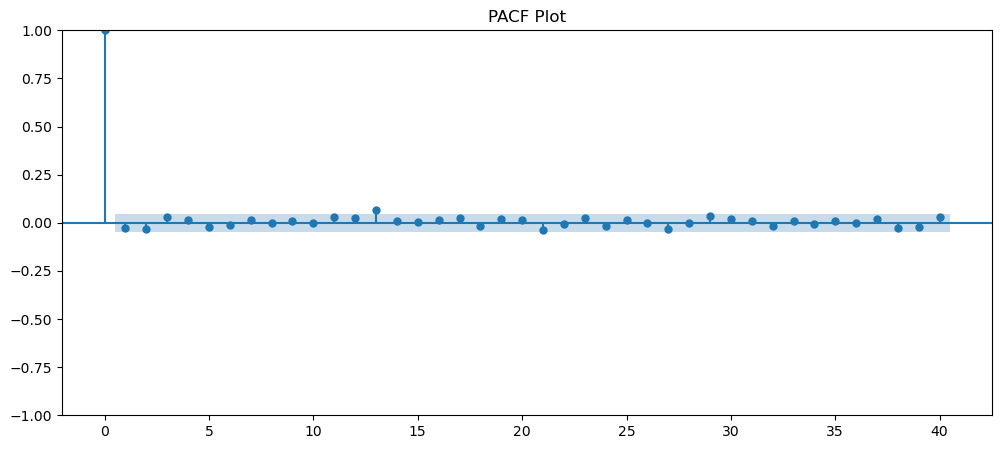

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,5))
plot_acf(daily_admissions, ax=plt.gca(), lags=40)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(daily_admissions, ax=plt.gca(), lags=40, method='ywm')
plt.title("PACF Plot")
plt.show()

In [16]:
#Training_Data

daily_admissions = daily_admissions.sort_index()

train_size = int(len(daily_admissions) * 0.8)

train = daily_admissions.iloc[:train_size]
test  = daily_admissions.iloc[train_size:]

print("Total length:", len(daily_admissions))
print("Train length:", len(train))
print("Test length:", len(test))


Total length: 1827
Train length: 1461
Test length: 366


In [17]:
print("\nTrain last dates:")
print(train.tail())

print("\nTest first dates:")
print(test.head())


Train last dates:
Date of Admission
2023-05-03    37
2023-05-04    23
2023-05-05    25
2023-05-06    29
2023-05-07    32
Freq: D, Name: admissions, dtype: int64

Test first dates:
Date of Admission
2023-05-08    27
2023-05-09    29
2023-05-10    27
2023-05-11    16
2023-05-12    36
Freq: D, Name: admissions, dtype: int64


In [18]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             admissions   No. Observations:                 1461
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4706.364
Date:                Mon, 29 Dec 2025   AIC                           9420.727
Time:                        11:42:57   BIC                           9441.875
Sample:                    05-08-2019   HQIC                          9428.616
                         - 05-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4331      0.160    189.631      0.000      30.119      30.748
ar.L1         -0.8877      0.157     -5.670      0.000      -1.194      -0.581
ma.L1          0.9031      0.146      6.201      0.0

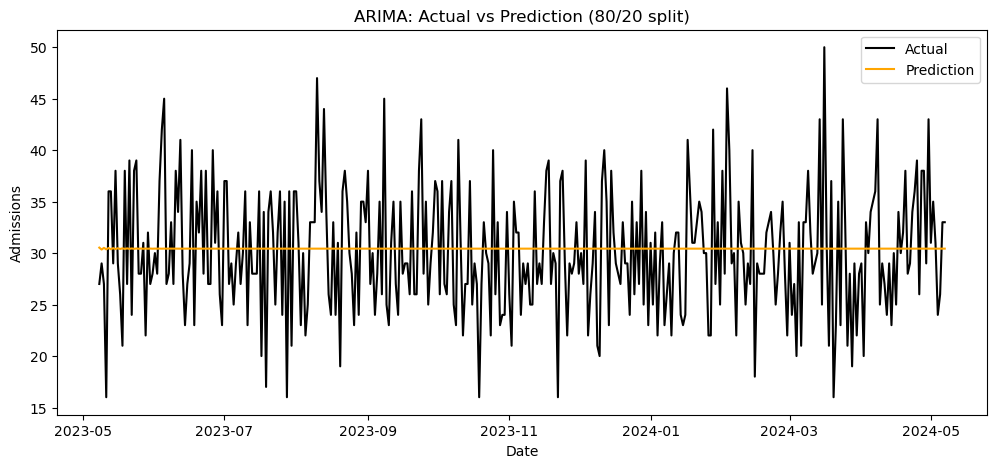

In [19]:
# Forecast for full test period
forecast = model_fit.get_forecast(steps=len(test))
y_pred = forecast.predicted_mean

# Plot
plt.figure(figsize=(12,5))
plt.plot(test.index, test, label="Actual", color="black")
plt.plot(y_pred.index, y_pred, label="Prediction", color="orange")
plt.title("ARIMA: Actual vs Prediction (80/20 split)")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()

In [26]:
#80/20 splits

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

series = daily_admissions.sort_index()

train_size = int(len(series) * 0.8)
train = series.iloc[:train_size]
test  = series.iloc[train_size:]

print("Train period:", train.index.min(), "to", train.index.max(), "len:", len(train))
print("Test period :", test.index.min(),  "to", test.index.max(),  "len:", len(test))

Train period: 2019-05-08 00:00:00 to 2023-05-07 00:00:00 len: 1461
Test period : 2023-05-08 00:00:00 to 2024-05-07 00:00:00 len: 366


In [27]:
arima_model = SARIMAX(
    train,
    order=(1, 0, 1),
    enforce_stationarity=False,
    enforce_invertibility=False
)
arima_result = arima_model.fit(disp=False)

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:             admissions   No. Observations:                 1461
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -4728.708
Date:                Mon, 29 Dec 2025   AIC                           9463.415
Time:                        11:55:46   BIC                           9479.272
Sample:                    05-08-2019   HQIC                          9469.331
                         - 05-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.64e-05   3.79e+04      0.000       1.000       1.000
ma.L1         -0.9974      0.004   -230.037      0.000      -1.006      -0.989
sigma2        48.5031      2.366     20.504      0.0

In [34]:
forecast = arima_result.get_forecast(steps=len(test))
y_pred = forecast.predicted_mean
y_pred.index = test.index

y_true = test
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
eps = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100
accuracy = 100 - mape

print("\nARIMA(1,0,1) performance on TEST set (70/30):")
print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE:", mape, "%")
print("Accuracy (100 - MAPE):", accuracy, "%")


ARIMA(1,0,1) performance on TEST set (70/30):
RMSE: 5.999540202734818
MAE : 4.829414904933559
MAPE: 16.8157419316974 %
Accuracy (100 - MAPE): 83.1842580683026 %


<Figure size 1200x500 with 0 Axes>

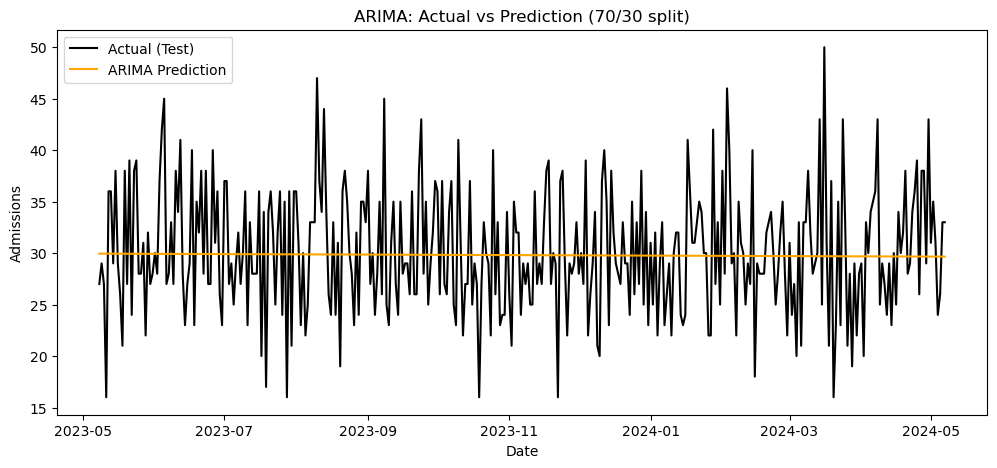

In [30]:
#For Plot

plt.figure(figsize=(12,5))
plt.plot(y_true.index, y_true, label="Actual (Test)", color="black")
plt.plot(y_pred.index, y_pred, label="ARIMA Prediction", color="orange")
plt.title("ARIMA: Actual vs Prediction (70/30 split)")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()

In [31]:
y_test = test

arima_df = pd.DataFrame({
    "date": y_test.index,
    "actual": y_test.values,
    "arima_pred": y_pred.values
})

arima_df.to_csv("../80_20 split/predictions/arima_predictions.csv", index=False)